# $\underline{\text{3D parabolic mirror raytracing simulation}}$

## $\underline{\text{Import statement}}$

In [81]:
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button
from ipywidgets import interact, interactive
from tqdm import tqdm
import ipywidgets as widgets
import numpy as np

## $\underline{\text{The parabolic surfaces.}}$



### The line of intersection of the two mirrors.


The function for the two parabolic surfaces.
\begin{align}
&f_{bottom\ mirror} = ax^2 + by^2 \tag{1}\\
&f_{top\ mirror} = \alpha x^2 + \beta y^2 + d \tag{2}
\end{align}
where $a$ and $b$ are constants. $f_{bottom\ mirror}$ and $f_{\top mirror}$ will be denoted as $f_{bm}$ and $f_{tm}$ respectively.

The line of intersection of the top mirror and bottom mirror is given by the following
\begin{align}
f_{bm} &= f_{tm}\\
ax^2 + by^2 &= \alpha x^2 + \beta y^2 + d\\
(a-\alpha)x^2 &+ (b-\beta)y^2 = d\\
\left(\frac{a-\alpha}{d}\right)x^2 &+ \left(\frac{b-\beta}{d}\right)y^2 = 1\\
\left(\frac{x}{\gamma}\right)^2 &+ \left(\frac{y}{\eta}\right)^2 = 1 \tag{3}
\end{align}
where $\gamma^2 = d/(a - \alpha)$ and $\eta^2 = d/(b - \beta)$
Given a range of $x$, the range of $y$ is given by
$y = \pm\sqrt{\eta^2-\frac{\eta^2x^2}{\gamma^2}}\tag{4}$

### Calculate the surface normal

The gradient of the surface
\begin{align}
\vec{\nabla}f(x,y) = \partial_xf(x,y)\hat{x} + \partial_yf(x,y)\hat{y}\tag{5} \\
\vec{\nabla}f(x,y) = 2\alpha x\hat{x} + 2\beta y\hat{y}\tag{6}
\end{align}
where $\alpha$ and $\beta$ is either $\pm a$ or $\pm b$ depending on which mirror is being described.

Let
\begin{equation}
\vec{v_x} =
\begin{pmatrix}
1\\0\\m_x
\end{pmatrix}
\vec{v_y} =
\begin{pmatrix}
0\\1\\m_y
\end{pmatrix} \tag{7}
\end{equation}
and
\begin{equation}
m_x = 2\alpha x\ \ \ m_y = 2\beta y\tag{8}
\end{equation}

The normal of the surface is given by
\begin{equation}
\hat{n} = \frac{\vec{v_x}\times\vec{v_y}}{\left|\vec{v_x}\times\vec{v_y}\right|} \tag{9}
\end{equation}

\begin{equation}
\hat{n} = \frac{-(2\alpha x\hat{x} + 2\beta y\hat{y} -1\hat{z})}{\sqrt{(2\alpha x)^2+)2\beta y)^2 + (1)^2}} \tag{10}
\end{equation}

### The angle between an incident vector and a surface normal vector

The angle between $\hat{n}$ and the incident beam $\hat{I}$ is given by
\begin{equation}
\phi = \cos^{-1}\left(\frac{\hat{n}\cdot\hat{I}}{|\hat{n}||\hat{I}|}\right)\tag{11}
\end{equation}

### Calculating the reflection vector

First calculate vector perpendicular to both $\hat{I}$ and $\hat{n}$,

$\hat{u} = \hat{I}\times\hat{n}\tag{12}$

Then calculate a vector perpendicular to $\hat{u}$ and in the same plane as $\hat{n}$

$\hat{e} = \hat{n}\times\hat{u}\tag{13}$

Then write the incident angle in the $\hat{e}$, $\hat{n}$ bases.

$\hat{I} = \left(\hat{I}\cdot\hat{n}\right)\hat{n} + \left(\hat{I}\cdot\hat{e}\right)\hat{e} \tag{14}$

Reflection vector
$\hat{R} = \cos(-\varphi)\hat{n} + \sin(-\varphi)\hat{e} \tag{15}$

In [82]:
# Parablic surface
def parabolic_surf(x,y,a=1,b=1,alpha=-1,beta=-1,offset = 0):
  tm = alpha*pow(x,2) + beta*pow(y,2) + offset
  bm = a*pow(x,2) + b*pow(y,2)
  surfaces = {'top mirror': tm,'bottom mirror': bm}
  return surfaces

# Calculates the normal at a given x and y
def parabolic_surf_normal(a,b,x=0,y=0):
  mx = 2*a*x
  my = 2*b*y
  vx = np.array([1,0,mx])
  vy = np.array([0,1,my])
  n = np.cross(vx,vy)
  return n/np.linalg.norm(n)

# Calculates incident angle
def incident_angle(normal_vector,incident_vector):
  angle = np.arccos(np.dot(normal_vector,incident_vector))
  return angle

# Reflection vector
def reflection_vector(normal_vector,incident_vector):
  angle = incident_angle(normal_vector,incident_vector)
  u = np.cross(incident_vector,normal_vector)
  u = u/np.linalg.norm(u)
  e = np.cross(normal_vector,u)
  e = e/np.linalg.norm(e)
  reflection = np.cos(-angle)*normal_vector + np.sin(-angle)*e
  return reflection

# Mirror line of intersection
def intersection_range(xmin,xmax,a=1,b=1,alpha=-1,beta=-1,offset=0):
  gamma_sq = offset/(a-alpha)
  eta_sq = offset/(b-beta)
  ymin = np.sqrt(eta_sq - (eta_sq*pow(xmin,2))/gamma_sq + 0j)
  ymax = -np.sqrt(eta_sq- (eta_sq*pow(xmax,2))/gamma_sq + 0j)
  return np.real(ymin),np.real(ymax),eta_sq,gamma_sq

def intersection(xmin,xmax,a=1,b=1,alpha=-1,beta=-1,offset = 0):
  ymin,ymax,eta_sq,gamma_sq = intersection_range(xmin,xmax,a,b,alpha,beta,offset)
  t = np.mgrid[0:2*np.pi:1000j]
  x = np.sqrt(gamma_sq)*np.cos(t)
  y = np.sqrt(eta_sq)*np.sin(t)
  z = a*pow(x,2) + b*pow(y,2)
  zp = alpha*pow(x,2)+beta*pow(y,2) + d
  return np.real(x),np.real(y),np.real(z),np.real(zp)

### $\underline{\text{Test Variables}}$

In [83]:
## Test Variables ##
x0,y0 = 0.31983, 0.78643               #..................... Initial incident location
a,b = 0.2, 0.2                         #..................... Parabolic constants
d = 1/(4*a)                            #..................... Offset for the top mirror

I = np.array([0,0,1])                  #..................... Initial incident vector
n = parabolic_surf_normal(a,b,x0,y0)   #..................... Normal vector
R = reflection_vector(n,I)             #..................... Reflection vector

theta_nI = np.arccos(np.dot(n,I))
theta_nR = np.arccos(np.dot(n,R))

z0 = parabolic_surf(x0,y0,a,b,-a,-b,d)['bottom mirror']

Pi = np.array([x0,y0,z0])              #..................... Initial incident point on bottom mirror

xmin = -1
xmax =  1
mirror_intersect_x,mirror_intersect_y,mirror_intersect_z,mirror_intersect_zp = intersection(xmin,xmax,a,b,-a,-b,d)

xrange_min = mirror_intersect_x.min()
xrange_max = mirror_intersect_x.max()

yrange_min = mirror_intersect_y.min()
yrange_max = mirror_intersect_y.max()

zrange_min = mirror_intersect_z.min()
zrange_max = mirror_intersect_z.max()

x,y = np.mgrid[xrange_min:xrange_max:500j,yrange_min:yrange_max:500j]
out_of_bounds = pow(y,2) > pow(xrange_max,2) - pow(x,2)
y[out_of_bounds] = np.NaN

mirror_surfaces = parabolic_surf(x,y,a,b,-a,-b,d)#.................... Mirror surfaces
tm_surf = mirror_surfaces['top mirror']
bm_surf = mirror_surfaces['bottom mirror']

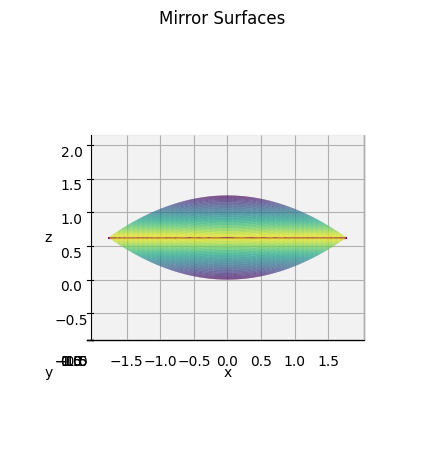

In [84]:
fig = plt.figure(figsize=(5.5,5.5))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, tm_surf,cmap='viridis_r', edgecolor='none',alpha=0.5)
ax.plot_surface(x, y, bm_surf,cmap='viridis', edgecolor='none',alpha=0.5)
ax.plot3D(mirror_intersect_x,mirror_intersect_y,mirror_intersect_z ,color='purple')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim([-1,1])
# plt.ylim([-1,1])
# ax.set_zlim(0,1)
ax.set_zlabel('z')
ax.set_proj_type('ortho')
ax.view_init(elev=00.0, azim=-90.0)
plt.title('Mirror Surfaces')
plt.show()

## $\underline{\text{Calculating the proceeding incident points.}}$

### Line along direction of reflection

A line along the reflected
$\vec{L} = \vec{P_I} + c\hat{R}\tag{16}$
where $\vec{P_I}$ is a point of on one of the mirrors, $\hat{R}$ is a normal vector along the direction of reflection, and $c$ is a scaling constant. The direction of $\hat{R}$ will determine if the reflection beam will go up to reflect off the top mirror or reflect again off the bottom mirror.

By determining $c$ in Eq. 16, the proceeding incident point can be determined. However, there are four senarios:

1.   Intersection with the bottom mirror from a bottom mirror reflection
2.   Intersection with the top mirror from a bottom mirror reflection
3. Intersection with the bottom mirror from a top mirror reflection
4. Intersection with the top mirror from a top mirror reflection

### Intersection with the bottom mirror from bottom mirror reflection.

Computing $c$ for an intersection with the bottom mirror from a bottom mirror reflection.

$\underline{\text{bottom mirror:}}$ $f_{bm}(x,y) = ax^2+by^2$

$\underline{\text{Line of reflection:}}$ $\vec{L} = \vec{P_I}+c\hat{R}$

$\underline{\text{Point of intersection:}}$ $\vec{P_1} = \begin{pmatrix}x_1\\y_1\\f_{bm}(x_1,y_1)\end{pmatrix}$

$\begin{pmatrix}x_1\\y_1\\f_{bm}(x_1,y_1)\end{pmatrix} = \begin{pmatrix}x\\y\\f_{bm}(x,y)\end{pmatrix} + c\begin{pmatrix}R_x\\R_y\\R_z\end{pmatrix}\tag{17}$

$x_1 = x+ cR_x\tag{18}$
$y_1 = y + cR_y\tag{19}$
$f_{bm}(x_1,y_1) = f_{bm}(x,y) + cR_z \tag{20}$

Substituting Eqs. 18 and 19 into 20 $c$ can be solved for.
\begin{align}
ax_1^2 + by_1^2 &= ax^2 + by^2 + cR_z\\
a(x + cR_x)^2 + b(y+cR_y)^2 &= ax^2 + by^2 + cR_z\\
a(x^2 + (cR_x)^2 + 2xcR_x) + b(y^2 + (cR_y)^2 + 2ycR_y) &= ax^2 + by^2 + cR_z\\
ac^2R_x^2 + 2axcR_x + bc^2R_y^2 + 2bycR_y &=  cR_z\\
acR_x^2 + 2axR_x + bcR_y^2 + 2byR_y &=  R_z\\
c(aR_x^2 + bR_y^2)  &=  R_z - (2axR_x + 2byR_y)\\
\end{align}

$c = \frac{R_z-2(axR_x+byR_y)}{aR_x^2+bR_y^2} \tag{21}$

### Intersection with top mirror from bottom mirror reflection

Computing $c$ for an intersection with the top mirror from a bottom mirror reflection.

$\underline{\text{bottom mirror:}}$ $f_{bm}(x,y) = ax^2+by^2$

$\underline{\text{top mirror:}}$ $f_{tm}(x,y) = \alpha x^2+\beta y^2 + d$

$\underline{\text{Line of reflection:}}$ $\vec{L} = \vec{P_I}+c\hat{R}$

$\underline{\text{Point of intersection:}}$ $\vec{P_1} = \begin{pmatrix}x_1\\y_1\\f_{tm}(x_1,y_1)\end{pmatrix}$

$
\begin{pmatrix}
x_1\\y_1\\f_{tm}(x_1,y_1)\end{pmatrix} = \begin{pmatrix}x\\y\\f_{bm}(x,y)\end{pmatrix} + c\begin{pmatrix}R_x\\R_y\\R_z
\end{pmatrix}\tag{22}
$

$x_1 = x+ cR_x\tag{23}$
$y_1 = y + cR_y\tag{24}$
$f_{tm}(x_1,y_1) = f_{bm}(x,y) + cR_z \tag{25}$

Substituting Eqs. 23 and 24 into 25 $c$ can be solved for.
\begin{align}
\alpha(x+cR_x)^2+\beta(y+cR_y)+d &= ax^2+by^2 + cR_z\\
\alpha(x^2+c^2R_x^2+2xcR_x)+\beta(y^2+c^2R_y^2+2ycR_y)+d &= ax^2+by^2 + cR_z\\
c^2(\alpha R_x^2+\beta R_y^2)+c(2\alpha xR_x+2\beta yR_y-R_z)+d &= (a-\alpha)x^2 + (b-\beta)y^2\\
c^2(\alpha R_x^2+\beta R_y^2)+c(2\alpha xR_x+2\beta yR_y-R_z)+ d &-(a-\alpha)x^2 - (b-\beta)y^2 = 0\\
\end{align}
Set
\begin{align}A &= \alpha R_x^2 + \beta R_y^2\\B&=2\alpha xR_x+2\beta yR_y - R_z\\\Gamma &= d - (a-\alpha)x^2 - (b-\beta)y^2\\
Ac^2 &+ Bc + \Gamma = 0
\end{align}
\
$
c = \left\{\begin{matrix}
\frac{1}{2A}\left(-B\pm\sqrt{B^2-4A\Gamma}\right) & ;A\neq0\\
\frac{-\Gamma}{B} & ;A = 0
\end{matrix}\right.
\tag{26}
$

### Intersection with bottom mirror from a top mirror reflection.

Computing $c$ for an intersection with the bottom mirror from a top mirror reflection.

$\underline{\text{bottom mirror:}}$ $f_{bm}(x,y) = ax^2+by^2$

$\underline{\text{top mirror:}}$ $f_{tm}(x,y) = \alpha x^2+\beta y^2 + d$

$\underline{\text{Line of reflection:}}$ $\vec{L} = \vec{P_I}+c\hat{R}$

$\underline{\text{Point of intersection:}}$ $\vec{P_1} = \begin{pmatrix}x_1\\y_1\\f_{bm}(x_1,y_1)\end{pmatrix}$

$
\begin{pmatrix}
x_1\\y_1\\f_{bm}(x_1,y_1)\end{pmatrix} = \begin{pmatrix}x\\y\\f_{tm}(x,y)\end{pmatrix} + c\begin{pmatrix}R_x\\R_y\\R_z
\end{pmatrix}\tag{27}
$

$x_1 = x+ cR_x\tag{28}$
$y_1 = y + cR_y\tag{29}$
$f_{bm}(x_1,y_1) = f_{tm}(x,y) + cR_z \tag{30}$

Substituting Eqs. 28 and 29 into 30 $c$ can be solved for.
\begin{align}
a(x+cR_x)^2+b(y+cR_y) &= \alpha x^2+\beta y^2 + d + cR_z\\
a(x^2+c^2R_x^2+2xcR_x)+b(y^2+c^2R_y^2+2ycR_y) &= \alpha x^2+\beta y^2 + d + cR_z\\
c^2(a R_x^2+b R_y^2)+c(2axR_x+2byR_y-R_z)&= (\alpha-a)x^2 + (\beta-b)y^2 + d\\
c^2(a R_x^2+b R_y^2)+c(2a xR_x+2b yR_y-R_z) &- (\alpha-a)x^2 - (\beta-b)y^2 - d = 0
\end{align}

Set
\begin{align}
A' &= a R_x^2 + b R_y^2\\B'&=2a xR_x+2b yR_y - R_z\\\Gamma' &= -d - (a-\alpha)x^2 - (b-\beta)y^2\\
A'c^2 &+ B'c + \Gamma' = 0
\end{align}
\
$
c = \left\{\begin{matrix}
\frac{1}{2A'}\left(-B'\pm\sqrt{B'^2-4A'\Gamma'}\right) & ;A\neq0\\
\frac{-\Gamma'}{B'} & ;A = 0
\end{matrix}\right.
\tag{31}
$

### Intersection with top mirror from a top mirror reflection.

Computing $c$ for an intersection with the top mirror from a top mirror reflection.

$\underline{\text{top mirror:}}$ $f_{tm}(x,y) = \alpha x^2+\beta y^2 + d$

$\underline{\text{Line of reflection:}}$ $\vec{L} = \vec{P_I}+c\hat{R}$

$\underline{\text{Point of intersection:}}$ $\vec{P_1} = \begin{pmatrix}x_1\\y_1\\f_{tm}(x_1,y_1)\end{pmatrix}$

$\begin{pmatrix}x_1\\y_1\\f_{tm}(x_1,y_1)\end{pmatrix} = \begin{pmatrix}x\\y\\f_{tm}(x,y)\end{pmatrix} + c\begin{pmatrix}R_x\\R_y\\R_z\end{pmatrix}\tag{32}$

$x_1 = x+ cR_x\tag{33}$
$y_1 = y + cR_y\tag{34}$
$f_{tm}(x_1,y_1) = f_{tm}(x,y) + cR_z \tag{35}$

Substituting Eqs. 18 and 19 into 20 $c$ can be solved for.
\begin{align}
\alpha x_1^2 + \beta y_1^2 + d &= \alpha x^2 + \beta y^2 + d + cR_z\\
\alpha(x+cR_x)^2 + \beta(y+cR_y)^2 &= \alpha x^2 + \beta y^2 + cR_z\\
\alpha(x^2+c^2R_x^2+2xcR_x) + \beta(y^2+c^2R_y^2+2ycR_y) &= \alpha x^2 + \beta y^2 + cR_z\\
c^2(\alpha R_x^2+\beta R_y^2)+c(2\alpha xR_x + 2\beta ycR_y) &= cR_z
\end{align}

$c = \frac{R_z-2(\alpha xR_x+\beta yR_y)}{\alpha R_x^2+\beta R_y^2} \tag{36}$


In [85]:
def scale_factor(reflectionVector,initial_point,mirror_intersection_z,a=1,b=1,alpha=-1,beta=-1,offset=0,):
  ## Cacluates the scaling factor to determine the next point of incident.
  Rx = reflectionVector[0]
  Ry = reflectionVector[1]
  Rz = reflectionVector[2]

  initial_x = initial_point[0]
  initial_y = initial_point[1]
  initial_z = initial_point[2]
  polar_angle = np.arccos(Rz/np.linalg.norm(reflectionVector))

  if initial_z < mirror_intersection_z and polar_angle < np.pi/2:
    # print('Up reflection from bottom mirror')
    A = alpha*pow(Rx,2) + beta*pow(Ry,2)
    B = 2*alpha*initial_x*Rx + 2*beta*initial_y*Ry - Rz
    Gamma = d - (a - alpha)*pow(initial_x,2) - (b - beta)*pow(initial_y,2)

    if bool(round(A,10)) == True: # Prevents problems if A = 0
      c_bottom_top_1 = (1/(2*A))*(-B + np.sqrt(pow(B,2)-4*A*Gamma))
      c_bottom_top_2 = (1/(2*A))*(-B - np.sqrt(pow(B,2)-4*A*Gamma))
    else:
      c_bottom_top_1 = c_bottom_top_2 = -Gamma/B

    c_bottom_bottom = (Rz - 2*(a*initial_x*Rx + b*initial_y*Ry))/(a*pow(Rx,2)+b*pow(Ry,2))
    scale = [c_bottom_top_1,c_bottom_top_2,c_bottom_bottom]

  elif initial_z < mirror_intersection_z and polar_angle > np.pi/2:
    # print('Down reflection from bottom mirror')
    c = (Rz - 2*(a*initial_x*Rx + b*initial_y*Ry))/(a*pow(Rx,2)+b*pow(Ry,2))
    scale = [c]

  elif initial_z > mirror_intersection_z and polar_angle > np.pi/2:
    # print('Down reflection from top mirror')
    Ap = a*pow(Rx,2) + b*pow(Ry,2)
    Bp = 2*a*initial_x*Rx + 2*b*initial_y*Ry - Rz
    Gammap = -d - (alpha-a)*pow(initial_x,2) - (beta-b)*pow(initial_y,2)

    if bool(round(Ap,10)) == True: # Prevents problems if Ap = 0
      c_top_bottom_1 = (1/(2*Ap))*(-Bp + np.sqrt(pow(Bp,2)-4*Ap*Gammap))
      c_top_bottom_2 = (1/(2*Ap))*(-Bp - np.sqrt(pow(Bp,2)-4*Ap*Gammap))
    else:
      c_top_bottom_1 = c_top_bottom_2 = -Gammap/Bp

    c_top_top = (Rz - 2*(alpha*initial_x*Rx + beta*initial_y*Ry))/(alpha*pow(Rx,2)+beta*pow(Ry,2))

    scale = [c_top_bottom_1,c_top_bottom_2,c_top_top]

  elif initial_z > mirror_intersection_z and polar_angle < np.pi/2:
    # print('Up reflection from top mirror')
    c = (Rz - 2*(alpha*initial_x*Rx + beta*initial_y*Ry))/(alpha*pow(Rx,2)+beta*pow(Ry,2))
    scale = [c]

  return scale

In [86]:
def possible_points(point,scale_factor,reflectionVector):
  ## Caluates the possible points from the scaling factor.
  candidates = []
  for i in scale_factor:
    candidates.append(point + i*reflectionVector)
  return candidates

def next_point_select(possible_points,mirror_intersect_x,mirror_intersect_y,mirror_intersect_z):
  ## Selects the correct point as the next point of incidence.
  check = []
  if isinstance(possible_points, list):
    for count, i in enumerate(possible_points):
      xycheck = bool(np.mean(np.sum(np.square(i[0:2])) < pow(mirror_intersect_x,2)+pow(mirror_intersect_y,2)))
      zcheck = i[2] > bool(np.mean(mirror_intersect_z))
      if zcheck == False:
        zcheck = i[2] < bool(np.mean(mirror_intersect_z))
      check.append(xycheck & zcheck)
    index = check.index(True)
    next_incident_point = possible_points[index]
  else:
    next_incident_point = possible_points
  return next_incident_point

## $\underline{\text{Point selection}}.$

In the case where multiple points are candidates for the next incident point, the correct point needs to be determined.

The points will be compared to the $xy$ of the mirror intersection, $g(x,y)$, using the following conditions.

$\begin{align}
P_{x}^2 + P_{y}^2 < x^2 + y^2&\Rightarrow \text{point is within mirrors}\\
P_{z} > g(x,y)&\Rightarrow \text{reflection goes to top mirror}\\
P_{z} < g(x,y)&\Rightarrow \text{reflection goes to bottom mirror}
\end{align}\tag{37}$

<!-- The above conditions are true if the reflected beam is coming from the bottom mirror, similar conditions can be written for a beam coming from the top mirror. -->


## $\underline{\text{Calculating multiple reflections for a single starting point}.}$

In [87]:
Inew = I
Nnew = parabolic_surf_normal(a,b,x0,y0)
Rnew = reflection_vector(Nnew,I)

Pnew = np.array([x0,y0,parabolic_surf(x0,y0,a,b)['bottom mirror']])
num_reflections = 11

incident_vectors = np.zeros([num_reflections,3])
reflection_vectors = np.zeros([num_reflections,3])
normal_vectors = np.zeros([num_reflections,3])

incident_points = np.zeros([num_reflections,3])

for i in tqdm(range(num_reflections), desc="Calculating Reflections..."):
  incident_vectors[i]   = Inew
  reflection_vectors[i] = Rnew
  normal_vectors[i]     = Nnew
  incident_points [i]   = Pnew

  scale = scale_factor(Rnew,Pnew,mirror_intersect_z.mean(),a,b,-a,-b,d)
  candidate_points = possible_points(Pnew,scale,Rnew)
  Pnew = next_point_select(candidate_points, mirror_intersect_x, mirror_intersect_y, mirror_intersect_z)

  Inew = -Rnew
  if Pnew[2] < mirror_intersect_z.mean():
    Nnew = parabolic_surf_normal(a,b,Pnew[0],Pnew[1])
  else:
    Nnew = parabolic_surf_normal(-a,-b,Pnew[0],Pnew[1])

  Rnew = reflection_vector(Nnew,Inew)

Calculating Reflections...: 100%|██████████| 11/11 [00:00<00:00, 1899.75it/s]


## $\underline{\text{Plotting Trajectories}}$

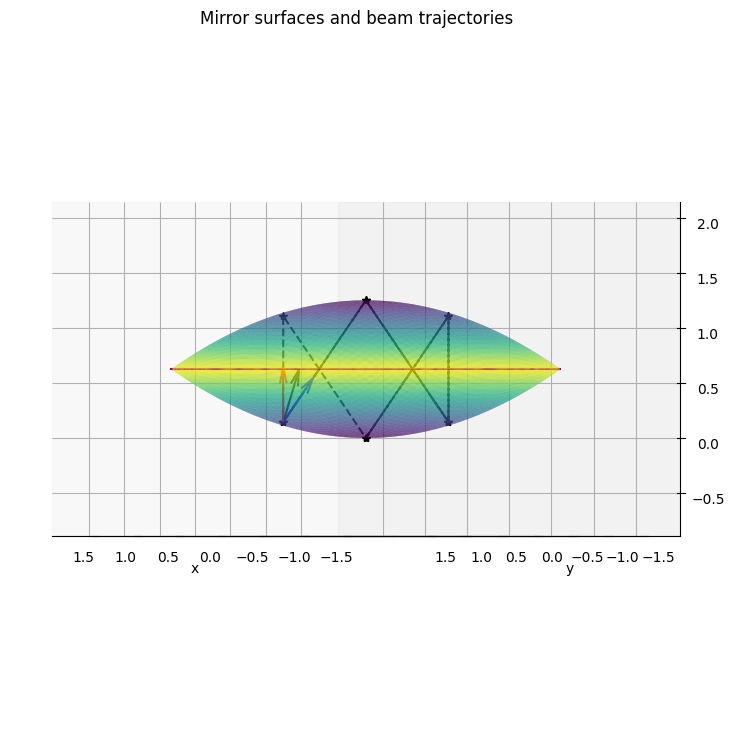

In [88]:
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, tm_surf,cmap='viridis_r', edgecolor='none',alpha=0.5)
ax.plot_surface(x, y, bm_surf,cmap='viridis', edgecolor='none',alpha=0.5)
ax.plot3D(mirror_intersect_x,mirror_intersect_y,mirror_intersect_z ,color='purple')

# ax.quiver(incident_points[:,0], incident_points[:,1], incident_points[:,2],
#           incident_vectors[:,0], incident_vectors[:,1], incident_vectors[:,2], length=0.5, normalize=True, color = 'red')
# ax.quiver(incident_points[:,0], incident_points[:,1], incident_points[:,2],
#           normal_vectors[:,0], normal_vectors[:,1], normal_vectors[:,2], length=0.5, normalize=True, color = 'black')
# ax.quiver(incident_points[:,0], incident_points[:,1], incident_points[:,2],
#           reflection_vectors[:,0], reflection_vectors[:,1], reflection_vectors[:,2], length=0.5, normalize=True, color = 'blue')

ax.quiver(incident_points[1-1,0], incident_points[1-1,1], incident_points[1-1,2],
          incident_vectors[1-1,0], incident_vectors[1-1,1], incident_vectors[1-1,2], length=0.5, normalize=True, color = 'red')
ax.quiver(incident_points[1-1,0], incident_points[1-1,1], incident_points[1-1,2],
          normal_vectors[1-1,0], normal_vectors[1-1,1], normal_vectors[1-1,2], length=0.5, normalize=True, color = 'black')
ax.quiver(incident_points[1-1,0], incident_points[1-1,1], incident_points[1-1,2],
          reflection_vectors[1-1,0], reflection_vectors[1-1,1], reflection_vectors[1-1,2], length=0.5, normalize=True, color = 'blue')

ax.plot3D(incident_points[:,0],incident_points[:,1],incident_points[:,2],'k*')
ax.plot3D(incident_points[:,0],incident_points[:,1],incident_points[:,2],'k--')

plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax.set_proj_type('ortho')
ax.view_init(elev= 0.0, azim= 130)
# ax.view_init(elev= 90.0, azim= -90)
plt.title('Mirror surfaces and beam trajectories')
plt.show()

## $\underline{\text{Calculating multiple reflections for a several starting point}.}$

In [89]:
X0 = np.arange(-0.8,0.8,0.8)
Y0 = np.sqrt(pow(0.81,2)-pow(X0,2))

X0 = np.concatenate([X0, X0])
Y0 = np.concatenate([Y0,-Y0])

X0 = X0.reshape([len(X0),1])
Y0 = Y0.reshape([len(Y0),1])

XY = np.concatenate([X0,Y0],axis=1)
num_reflections = 6

Calculating Reflections...: 100%|██████████| 4/4 [00:00<00:00, 76.85it/s]


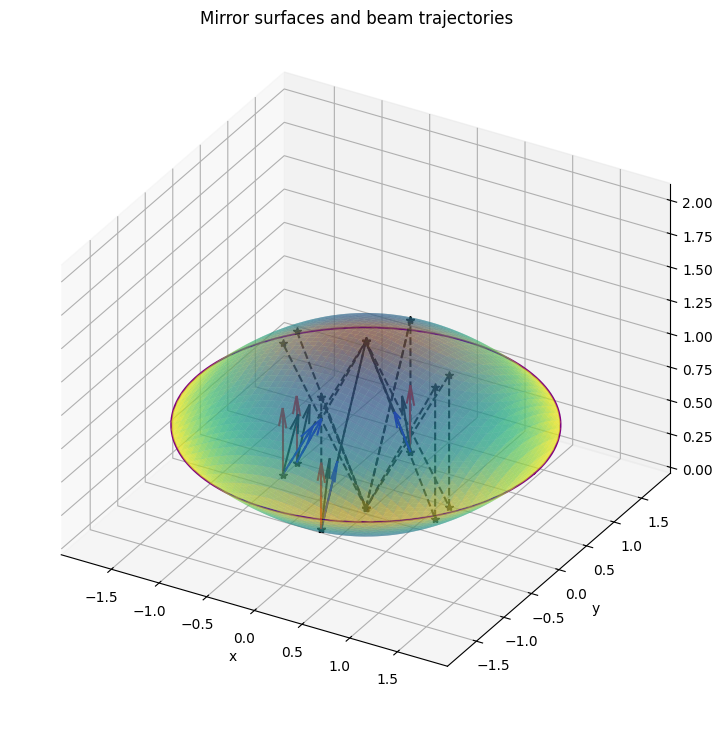

In [90]:
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, tm_surf,cmap='viridis_r', edgecolor='none',alpha=0.5)
ax.plot_surface(x, y, bm_surf,cmap='viridis', edgecolor='none',alpha=0.5)
ax.plot3D(mirror_intersect_x,mirror_intersect_y,mirror_intersect_z ,color='purple')

for i in tqdm(range(len(XY)), desc="Calculating Reflections..."):
  Inew = I
  Nnew = parabolic_surf_normal(a,b,XY[i,0],XY[i,1])
  Rnew = reflection_vector(Nnew,I)
  Pnew = np.array([XY[i,0],XY[i,1],parabolic_surf(XY[i,0],XY[i,1],a,b,-a,-b,d)['bottom mirror']])

  incident_vectors = np.zeros([num_reflections,3])
  reflection_vectors = np.zeros([num_reflections,3])
  normal_vectors = np.zeros([num_reflections,3])
  incident_points = np.zeros([num_reflections,3])

  for j in range(num_reflections): #tqdm(range(num_reflections), desc="Calculating Reflections..."):
    incident_vectors[j] = Inew
    reflection_vectors[j] = Rnew
    normal_vectors[j] = Nnew
    incident_points [j] = Pnew

    scale = scale_factor(Rnew,Pnew,mirror_intersect_z.mean(),a,b,-a,-b,d)
    candidate_points = possible_points(Pnew,scale,Rnew)
    Pnew = next_point_select(candidate_points,mirror_intersect_x,mirror_intersect_y,mirror_intersect_z)

    Inew = -Rnew
    if Pnew[2] < mirror_intersect_z.mean():
      Nnew = parabolic_surf_normal(a,b,Pnew[0],Pnew[1])
    else:
      Nnew = parabolic_surf_normal(-a,-b,Pnew[0],Pnew[1])

    Rnew = reflection_vector(Nnew,Inew)

  ax.quiver(incident_points[0,0], incident_points[0,1], incident_points[0,2],
            incident_vectors[0,0], incident_vectors[0,1], incident_vectors[0,2],
            length=0.5, normalize=True, color = 'red')
  ax.quiver(incident_points[0,0], incident_points[0,1], incident_points[0,2],
            normal_vectors[0,0], normal_vectors[0,1], normal_vectors[0,2],
            length=0.5, normalize=True, color = 'black')
  ax.quiver(incident_points[0,0], incident_points[0,1], incident_points[0,2],
            reflection_vectors[0,0], reflection_vectors[0,1], reflection_vectors[0,2],
            length=0.5, normalize=True, color = 'blue')

  ax.plot3D(incident_points[:,0],incident_points[:,1],incident_points[:,2],'k*')
  ax.plot3D(incident_points[:,0],incident_points[:,1],incident_points[:,2],'k--')

plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax.set_zlim(bottom = 0)
ax.set_proj_type('ortho')
# ax.view_init(elev=0, azim=-90.0)
plt.title('Mirror surfaces and beam trajectories')
plt.show()